In [89]:
import pandas as pd

In [90]:
df = pd.read_csv('googleplaystore.csv')
print(df.head(10))

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1

In [91]:
df.isnull().sum() 

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [92]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64


In [93]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

In [94]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [95]:
print(df['Installs'].head())

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object


In [96]:
df['Installs'] = df['Installs'].replace({',': '', '\+': ''}, regex=True)

In [97]:
print(df['Installs'].head())

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: object


In [98]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

In [99]:
df['Installs'] = df['Installs'].replace([float('inf'), -float('inf')], 0)
df['Installs'] = df['Installs'].fillna(0)
df['Installs'] = df['Installs'].astype('int64')

In [100]:
df['Price'] = df['Price'].replace({'\$': ''}, regex=True)

In [101]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [102]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Distribution of App Ratings

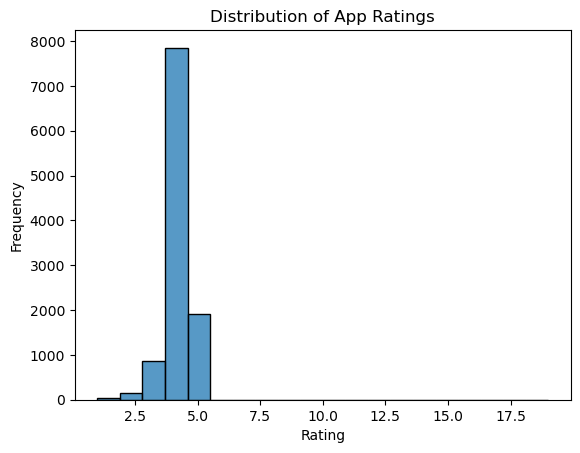

<Figure size 640x480 with 0 Axes>

In [111]:
sns.histplot(df['Rating'], bins = 20)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()
plt.clf()

In [ ]:
#Number of Installs by Category

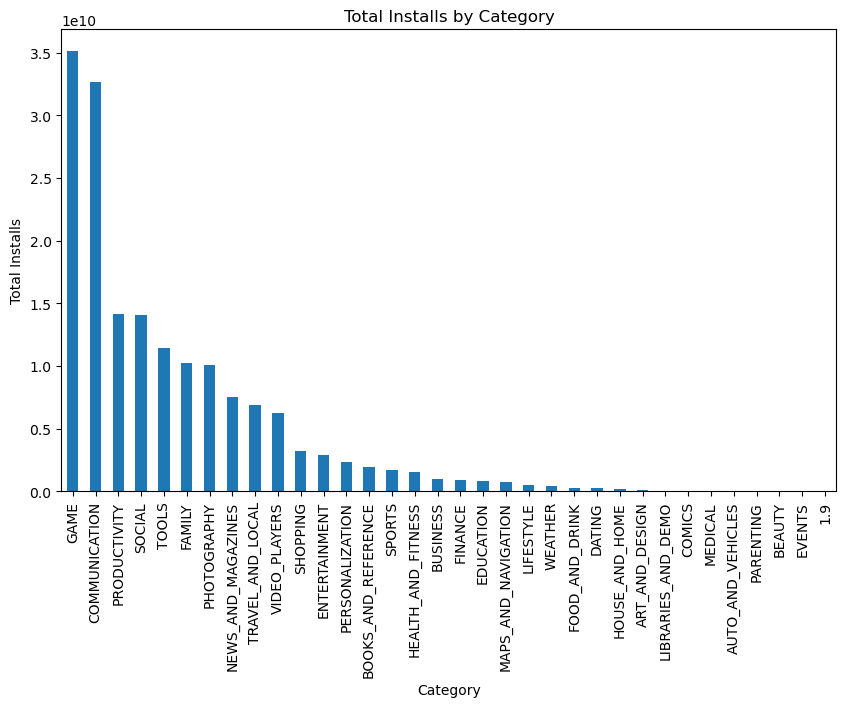

In [114]:
category_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)
category_installs.plot(kind='bar', figsize=(10, 6))
plt.title('Total Installs by Category')
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.show()
plt.clf()

In [ ]:
#Price Distribution

In [117]:
paid_apps = df[df['Type'] == 'Paid']

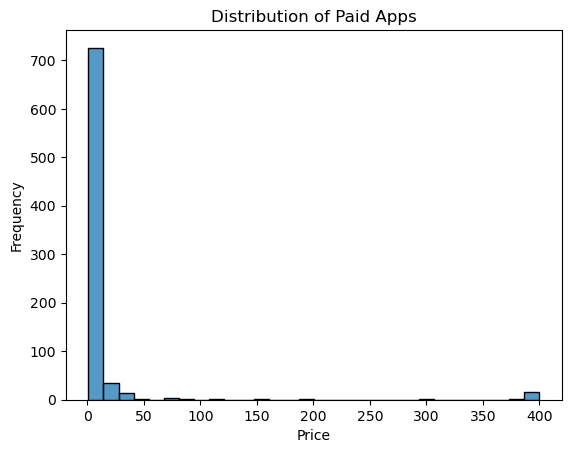

<Figure size 640x480 with 0 Axes>

In [122]:
sns.histplot(paid_apps['Price'], bins=30)
plt.title('Distribution of Paid Apps')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
plt.clf()

In [ ]:
#Number of Installs by Genres (Top 5)

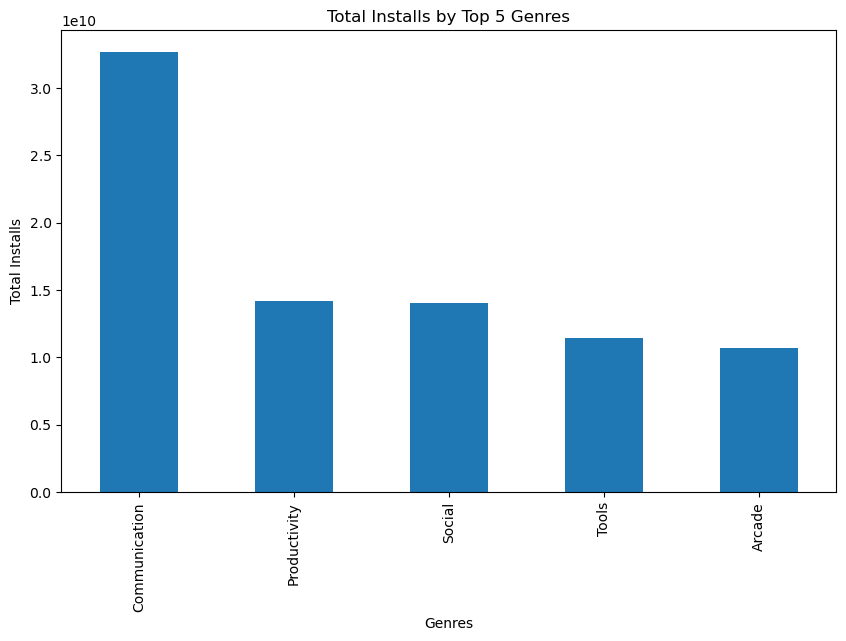

<Figure size 640x480 with 0 Axes>

In [129]:
genres_installs = df.groupby('Genres')['Installs'].sum().sort_values(ascending=False)
top_5_genres = genres_installs.head(5)
top_5_genres.plot(kind='bar', figsize=(10, 6))
plt.title('Total Installs by Top 5 Genres')
plt.xlabel('Genres')
plt.ylabel('Total Installs')
plt.show()
plt.clf()

In [ ]:
#Review Counts by Category

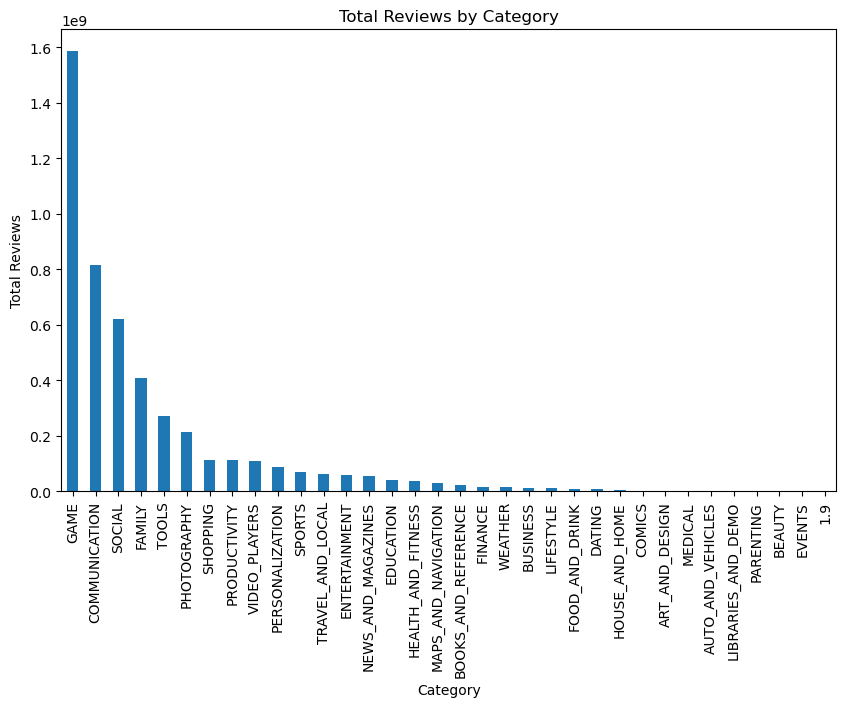

<Figure size 640x480 with 0 Axes>

In [130]:
category_reviews = df.groupby('Category')['Reviews'].sum().sort_values(ascending=False)
category_reviews.plot(kind='bar', figsize=(10, 6))
plt.title('Total Reviews by Category')
plt.xlabel('Category')
plt.ylabel('Total Reviews')
plt.show()
plt.clf()

In [ ]:
#Distribution of Apps in Different Content Ratings

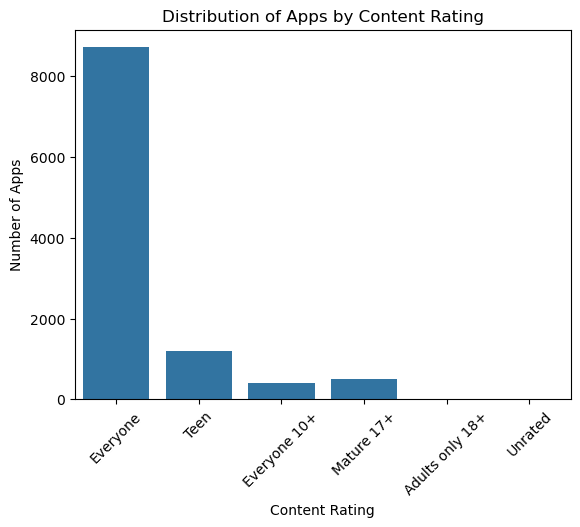

In [133]:
sns.countplot(data=df, x='Content Rating')
plt.title('Distribution of Apps by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.show()